# 2.概率分布

In [16]:
# preparation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.rv import (
    Bernoulli,
    Beta,
    Categorical,
    Dirichlet,
    Gamma,
    Gaussian,
    MultivariateGaussian,
    MultivariateGaussianMixture,
    StudentsT,
    Uniform
)

np.random.seed(1234)

本章学习各种特殊的概率分布。作用：在有限观测下，对p(x)进行建模-密度估计.每次取样都是独立同分布的。<p>
我们用离散随机变量的二项分布和多项式分布，连续随机变量的高斯分布的参数估计。
- 频率派计算似然函数之类的确定参数。
- 贝叶斯派引入参数的先验，来计算后验。<p>

还有个重要概念：共轭先验：后验概率和先验概率分布相同。<p>
也会介绍非参数密度估计的方法。

## 2.1 二元变量
x只能取0或1，取1的概率是$\mu$(扔损坏的硬币)

$$ p(x = 1|\mu) = \mu \tag{2.1} $$

$0 \leq \mu \leq 1 $，所以$ p(x=0|\mu) = 1 - \mu $。概率分布为：

$$ Bern(x|\mu) = \mu^x(1-\mu)^{1 - x} \tag{2.2} $$

这就是伯努利分布。

它归一化的，均值和方差也可以计算。

$E[x]=\mu \tag{2.3}$

$var[x]=\mu(1-\mu) \tag{2.4}$

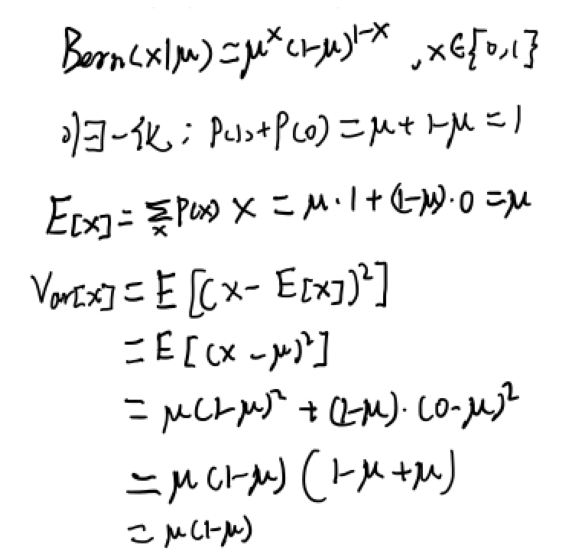

In [5]:
# bern归一化
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1bern归一化.png')
plt.axis('off')
ax.imshow(d)

如果观测值是数据集$D=\{x_1,...,x_N\}$，每次观测都是在$p(x|\mu)$中抽取。则似然函数有：

$$ p(D|\mu) = \prod\limits_{n=1}^Np(x_n|\mu) = \prod\limits_{n=1}^{N}\mu^{x_n}(1-\mu)^{1-x_n} \tag{2.5} $$

频度派：最大化似然函数来估计参数》最大化对数似然。

$$ \ln p(D|\mu) = \sum\limits_{n=1}^N\ln p(x_n|\mu) = \sum\limits_{n=1}^N{x_n\ln \mu + (1 - x_n)\ln(1-\mu)} \tag{2.6} $$

**这个只用N次观测结果得到的似然函数，也叫充分统计量。**令其导数为零，我们有最大似然的估计值时的$\mu$:

$$ \mu_{ML} = \frac{1}{N}\sum\limits_{n=1}^N x_n \tag{2.7} $$

这也叫做样本均值。如果把x=1的观测次数记录为m，则2.7可以写成：

$$ \mu_{ML} = \frac{m}{N} \tag{2.8} $$

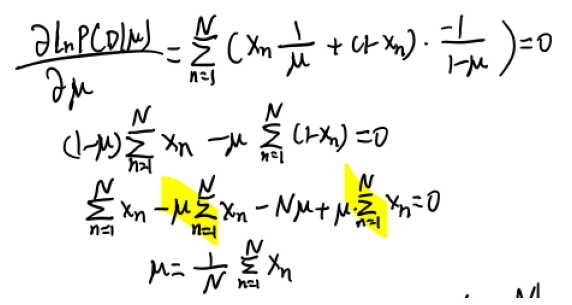

In [9]:
# 最大似然
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1最大似然.png')
plt.axis('off')
ax.imshow(d)

但这个只用观测可能不靠谱，扔硬币三次刚好都是正面N=m=3,则会判断未来观测都是正面。

In [3]:
model = Bernoulli()
model.fit(np.array([0., 1., 1., 1.]))
print(model)

Bernoulli(
    mu=0.75
)


In [4]:
model = Bernoulli()
model.fit(np.array([1., 1., 1., 1.]))
print(model)

Bernoulli(
    mu=1.0
)


一般引入先验来解决。

换一个角度，在给定数据集规模N的条件下，x=1的观测出现数量m的概率分布：二项分布。

概率是正比于$ \mu^m(1 - \mu)^{N - m} $的.就是每次扔硬币的结果叠乘得到的。

而且需要归一化常数：N次抛掷中，m个正面向上的次数的组合$C_N^m$为归一化常数。

$$ Bin(m|N, \mu) = \binom{N}{m}\mu^m(1 - \mu)^{N - m} \tag{2.9} $$

其中 $$ \binom{N}{m} \equiv \frac{N!}{(N - m)!m!} \tag{2.10} $$

$ N = 10, \mu = 0.25 $二项式分布示意图:

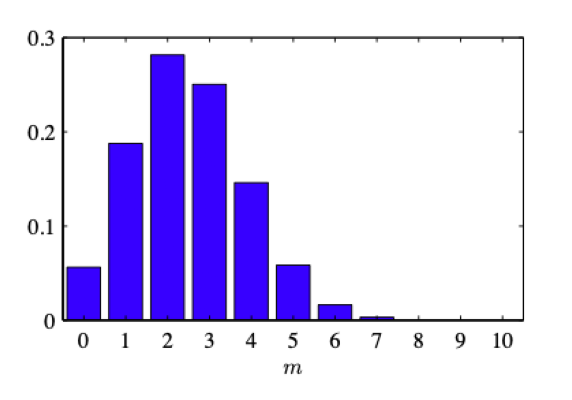

In [7]:
# 二项分布
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1二项分布.png')
plt.axis('off')
ax.imshow(d)

根据1.10:加和的均值是均值的加和，加和的方差是方差的加和:

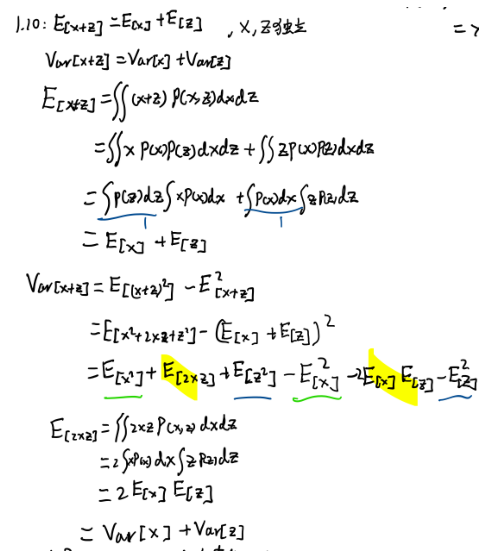

In [8]:
# 1.10
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.11.10.png')
plt.axis('off')
ax.imshow(d)

$m=x_1+...+x_N$，因此我们有:<p>

$$
\mathbb{E}[m] \equiv \sum_{m=0}^{N} m \operatorname{Bin}(m \mid N, \mu)=N \mu \tag{2.11}
$$
    
$$
\mathbb{E}[m] \equiv \sum_{m=0}^{N} (m-E[m])^2 \operatorname{Bin}(m \mid N, \mu)=N \mu(1-\mu) \tag{2.12}
$$

## 2.1.1 Beta分布
直接用最大似然，小数据集会过拟合。引入$\mu$的先验来解决。

似然是一个$ \mu^x(1-\mu)^{1-x} $的乘积形式。我们选择先验也是这样的形式的话，后验也会是这样的形式。这叫做共轭性。所以我们选择先验为Beta分布：

$$ Beta(\mu|a, b) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1} \tag{2.13} $$

其中 $$ \Gamma(x) \equiv \int_0^\infty u^{x-1}e^{-u}du $$



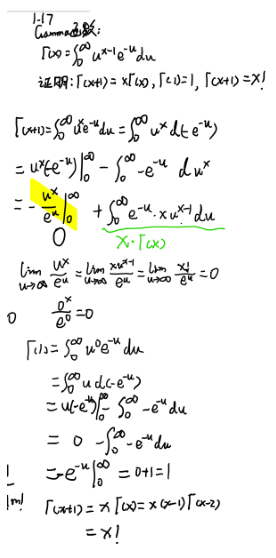

In [19]:
# Gamma函数性质
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1Gamma函数性质.png')
plt.axis('off')
ax.imshow(d)

满足归一化

$$ \int_0^1 Beta(\mu|a,b)d\mu = 1 \tag{2.14} $$


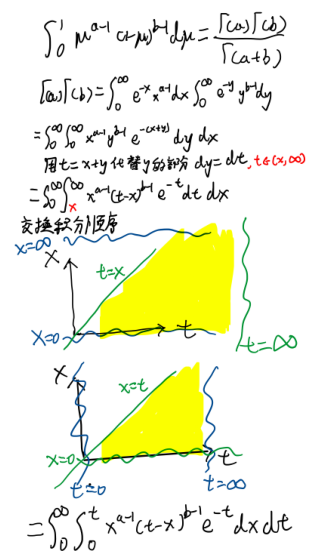

In [24]:
# 归一化证明up
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1归一化证明up.png')
plt.axis('off')
ax.imshow(d)

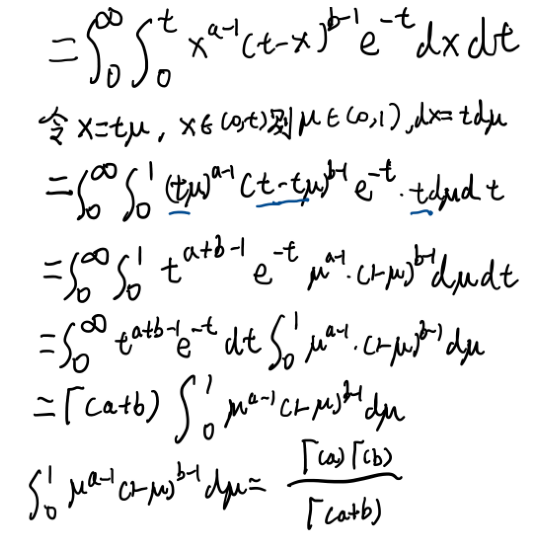

In [25]:
# 归一化证明down
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1归一化证明down.png')
plt.axis('off')
ax.imshow(d)

均值和方差：
$E[\mu]= \frac{a}{a + b} \tag{2.15}$

$\ var[\mu] =\frac{ab}{(a+b)^2(a+b+1)} \tag{2.16}$
这里a和b是超参数。

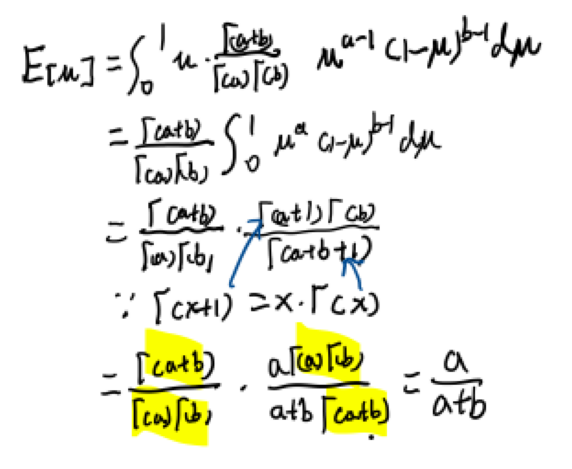

In [21]:
# 均值
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1均值.png')
plt.axis('off')
ax.imshow(d)

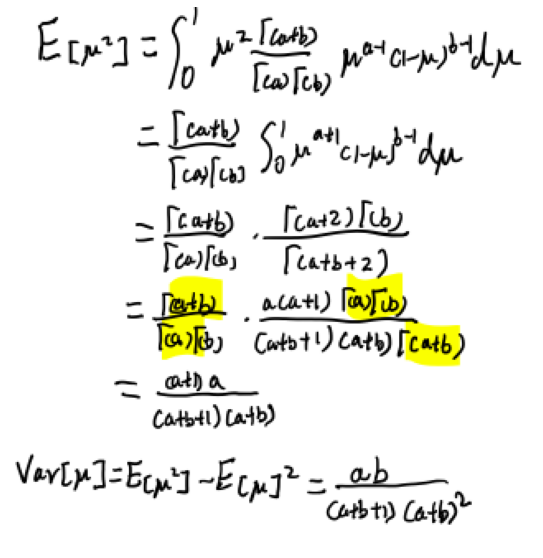

In [22]:
# 方差
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1方差.png')
plt.axis('off')
ax.imshow(d)

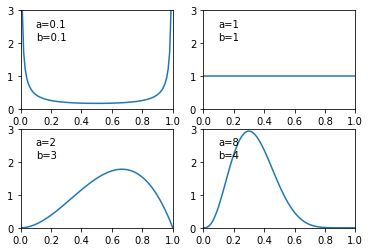

In [17]:
# 不同超参数对应图
x = np.linspace(0, 1, 100)
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]]):
    plt.subplot(2, 2, i + 1)
    beta = Beta(a, b)
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    plt.plot(x, beta.pdf(x))
    plt.annotate("a={}".format(a), (0.1, 2.5))
    plt.annotate("b={}".format(b), (0.1, 2.1))
plt.show()

Beta先验2.13和二项似然函数2.9相乘，归一化，可得到：

$$ p(\mu|m,l,a,b) \propto \mu^{m+a-1}(1-\mu)^{l+b-1} \tag{2.17} $$

其中l=N-m。和先验分布的形式相同。共轭。对比2.13就可以得到归一化系数。

$$ p(\mu|m,l,a,b) = \frac{\Gamma(m+a+l+b)}{\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1} \tag{2.18} $$

从先验到后验，a的值增加了m，b的值增加了l。超参数a和b叫有效观测数。再进行新的观测，这里的后验又变成下次观测的先验。

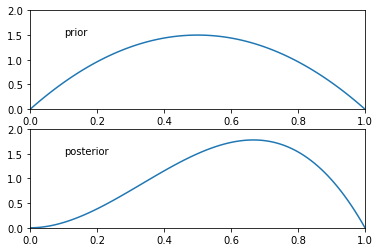

In [18]:
# 贝叶斯顺序推断
beta = Beta(2, 2)
plt.subplot(2, 1, 1)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.plot(x, beta.pdf(x))
plt.annotate("prior", (0.1, 1.5))

model = Bernoulli(mu=beta)
model.fit(np.array([1]))
plt.subplot(2, 1, 2)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.plot(x, model.mu.pdf(x))
plt.annotate("posterior", (0.1, 1.5))

plt.show()

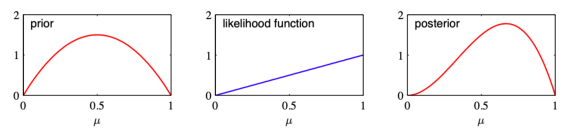

In [26]:
# 贝叶斯顺序推断
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1贝叶斯顺序推断.png')
plt.axis('off')
ax.imshow(d)

先验为Beta分布，a=2,b=2,似然是2.9,其中N=m=1，后验概率是Beta分布，变成a=3,b=2.这样**顺序学习，每次有新数据，用更新过的先验来处理就可以，不需要之前的数据**。

如果我们目标是尽可能好地进行预测下一次数据，那么在给定观测数据D的情况下，x的预测分布就是：

$$ p(x=1|D) = \int_0^1p(x=1|\mu)p(\mu|D)d\mu = \int_0^1\mu p(\mu|D)d\mu = \mathbb{E}[\mu|D] \tag{2.19} $$

根据2.18和2.13的形式对应。和2.15对比，我们可以得到：

$$ p(x=1|D) = \frac{m+a}{m+a+l+b} \tag{2.20} $$

当m,l趋近于无限大，2.20变成最大似然的结果2.8.**贝叶斯后验和最大似然结果在数据趋近于无穷的情况会统一**。数据没那么多，$\mu$的后验均值在先验均值和公式2.7给出的最大似然之间。

在图中，当观测数量增多，后验分布更尖了。2.16的公式给出的方差也可以看书，a或b趋近于无穷的时候，方差就趋于零。**观测点增加，后验的不确定性下降**

我们用频率学角度证明这点。考虑一个贝叶斯推断，参数为$\theta$并且观测了一个数据集D，由联合分布$p(\theta,D)$表示.

$$ \mathbb{E}_\theta[\theta] = \mathbb{E}_D[\mathbb{E}_\theta[\theta|D]] \tag{2.21} $$ 

其中 
$ \mathbb{E}_\theta[\theta] = \int p(\theta)\theta d\theta \tag{2.22}$

$$
\mathbb{E}_{\mathcal{D}}\left[\mathbb{E}_{\boldsymbol{\theta}}[\boldsymbol{\theta} \mid \mathcal{D}]\right] \equiv \int\left\{\int \boldsymbol{\theta} p(\boldsymbol{\theta} \mid \mathcal{D}) \mathrm{d} \boldsymbol{\theta}\right\} p(\mathcal{D}) \mathrm{d} \mathcal{D}
\tag{2.23} $$

$ \theta $的后验均值（在产生数据集的分布上的平均）等于$ \theta $的先验均值。同样的我们可以得到：

$$ var_\theta[\theta] = \mathbb{E}_D[var_\theta[\theta|D]] + var_D[\mathbb{E}_\theta[\theta|D]] \tag{2.24} $$

公式（2.24）中左边是$ \theta $的先验方差。右边的第一项是$ \theta $的后验方差的均值。第二项是$ \theta $的后验均值的方差。因为方差是一个正的量（第二项大于零），所以一般来说，$ \theta $的后验方差小于先验方差。后验均值的方差越大，这个差值的就越大。注意，这个结果只在通常情况下成立，对于特定的观测数据集，后验方差有可能大于先验方差。

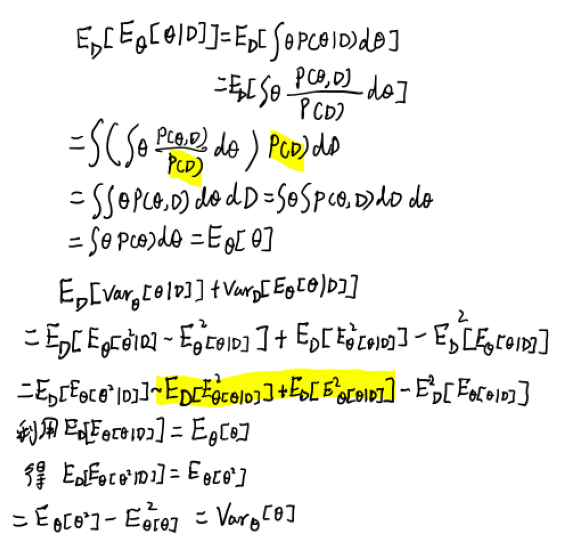

In [23]:
# 频率学证明
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1频率学证明.png')
plt.axis('off')
ax.imshow(d)